# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [5]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [6]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info()) 

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary of the data:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Statistical Summary of the data:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+06              

In [7]:
Aggregated_Data = df.groupby('Year').mean().reset_index()
Aggregated_Data.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

In [8]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
Descriptive_Statistics = Aggregated_Data.describe()
Descriptive_Statistics


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1961.500000,14.499538,350.028626,149.988859,9.000886
std,35.939764,0.009960,0.456535,1.032095,0.037547
min,1900.000000,14.474559,348.642249,148.051748,8.893453
25%,1930.750000,14.492782,349.691692,149.207437,8.978851
50%,1961.500000,14.499496,350.022334,149.918062,8.998274
75%,1992.250000,14.504872,350.367023,150.560328,9.027985
max,2023.000000,14.527762,351.003294,152.671944,9.101611


Using Histrogram to understand the distribution

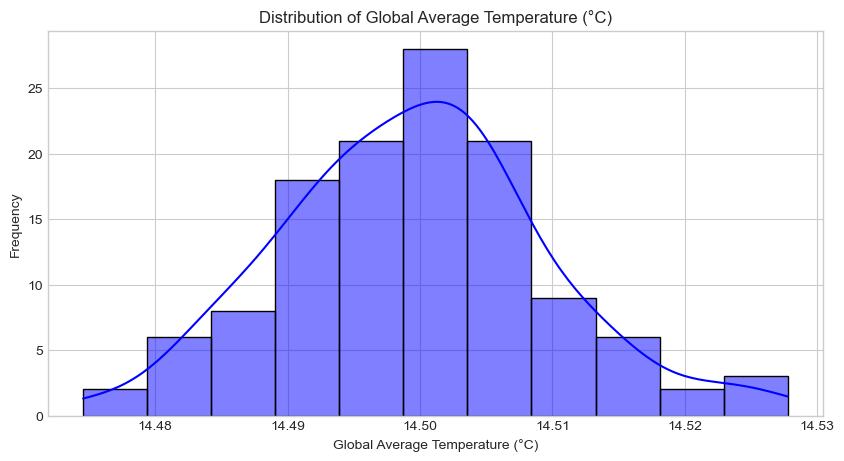

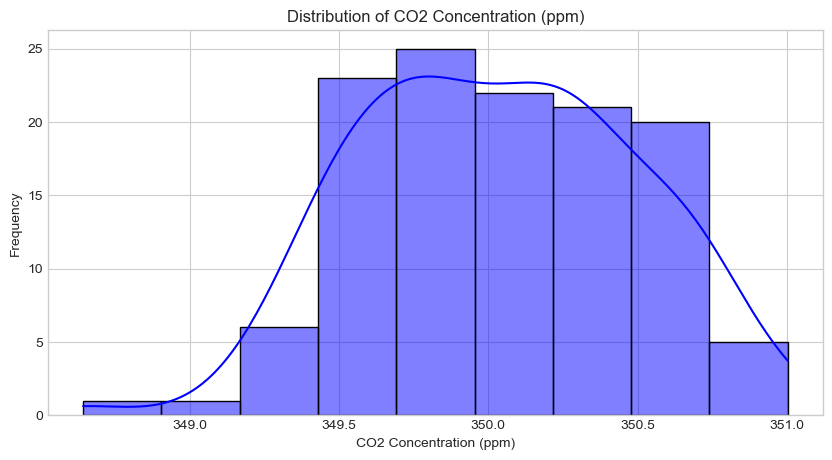

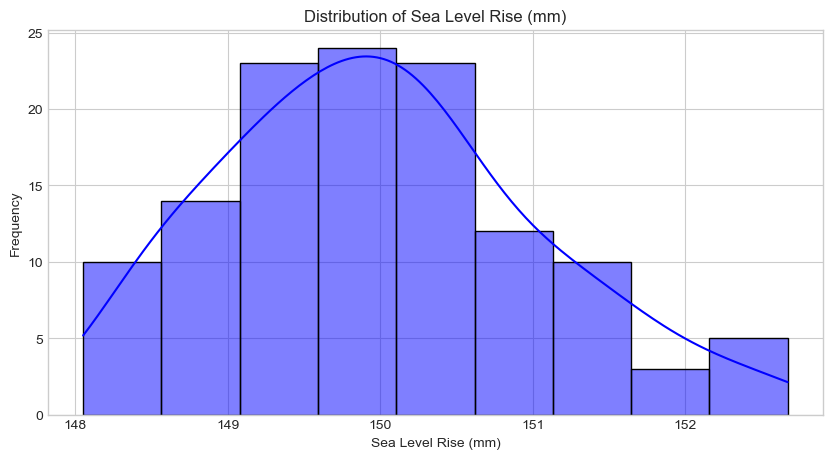

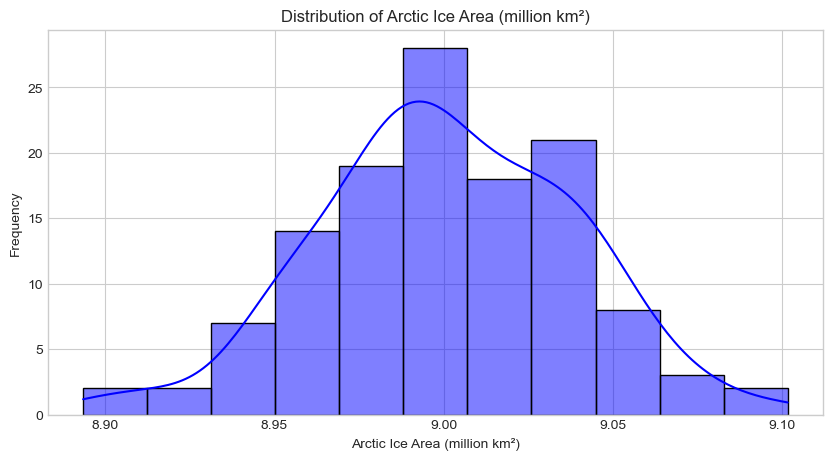

In [9]:
for column in Aggregated_Data.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.histplot(Aggregated_Data[column], kde=True,color='blue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

using timeplots to understand the trend during different time


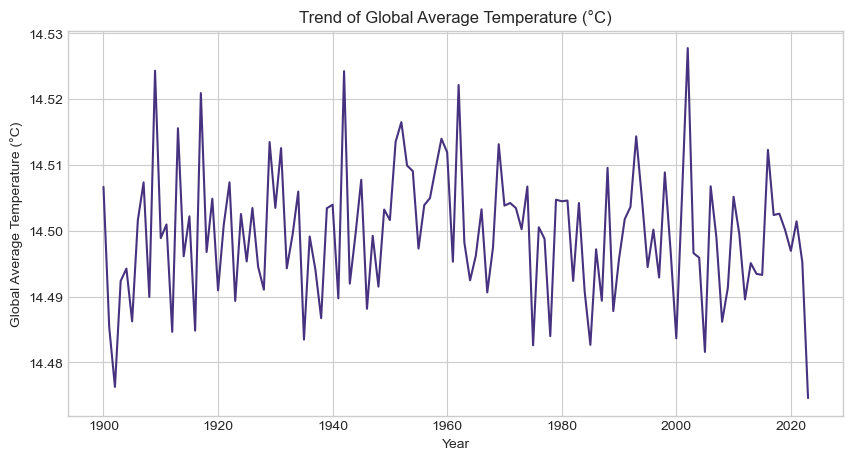

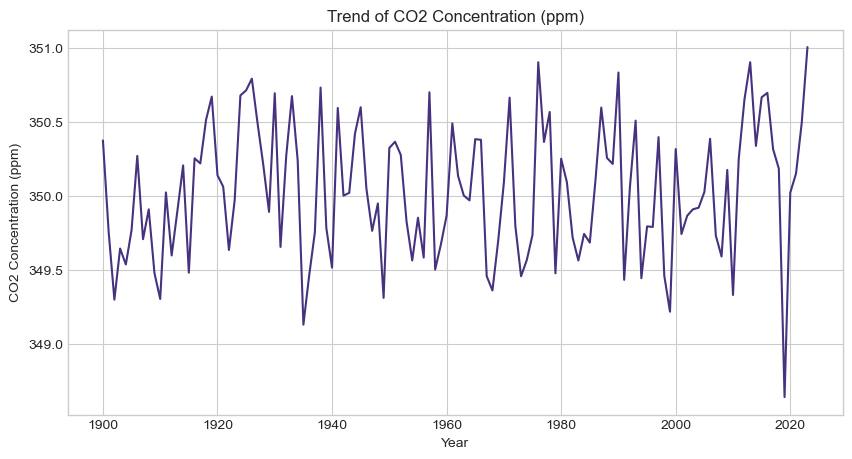

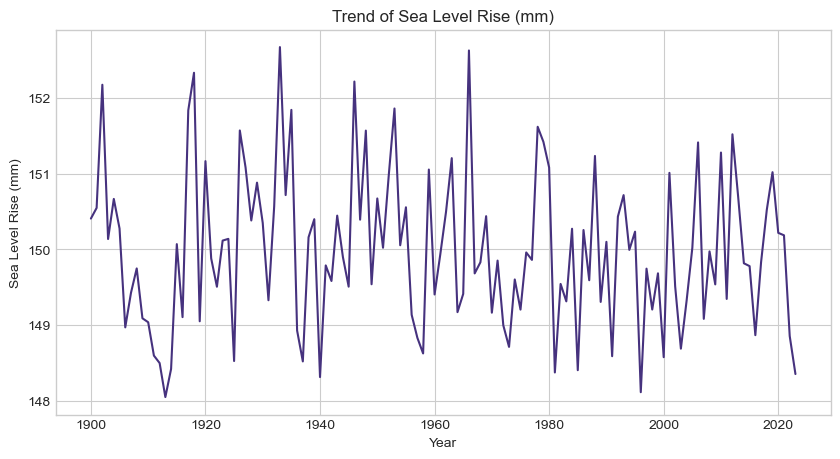

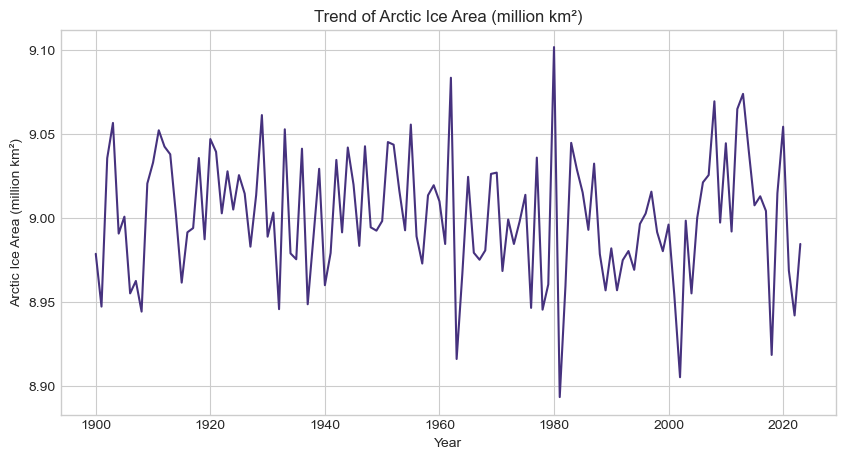

In [10]:
for column in Aggregated_Data.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=Aggregated_Data, x='Year', y=column)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Trend of {column}')
    plt.show()

Using Boxplot to see the outliers

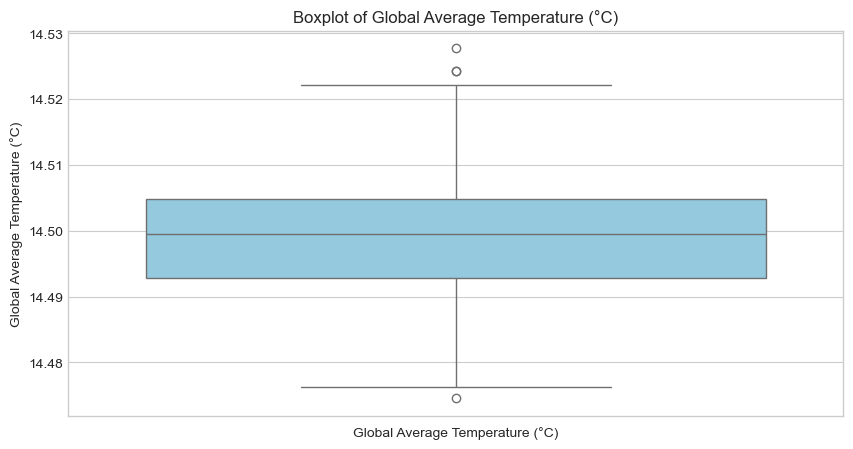

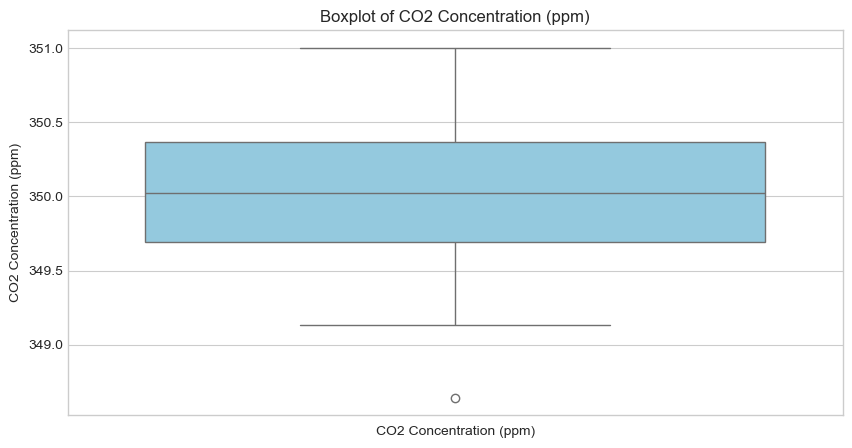

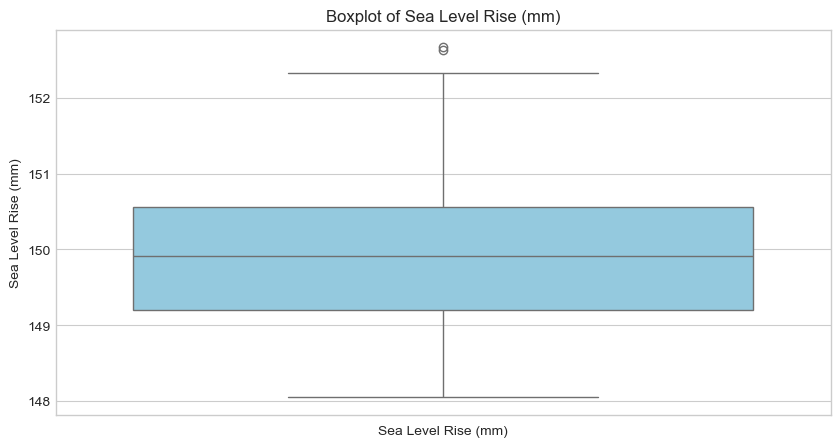

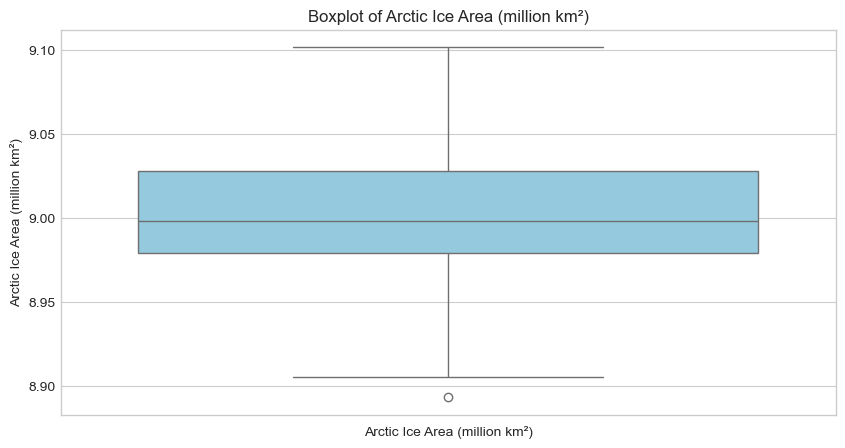

In [11]:
for column in Aggregated_Data.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(Aggregated_Data[column],color='skyblue')
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [12]:
Correlation_Matrix = Aggregated_Data.corr()
Correlation_Matrix

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,1.000000,-0.044397,0.082761,-0.081506,-0.082203
Global Average Temperature (°C),-0.044397,1.000000,-0.067980,0.003878,0.047027
CO2 Concentration (ppm),0.082761,-0.067980,1.000000,0.098212,0.009986
Sea Level Rise (mm),-0.081506,0.003878,0.098212,1.000000,0.129528
Arctic Ice Area (million km²),-0.082203,0.047027,0.009986,0.129528,1.000000


Scatter plot : CO2 Concentration vs Global Temperature

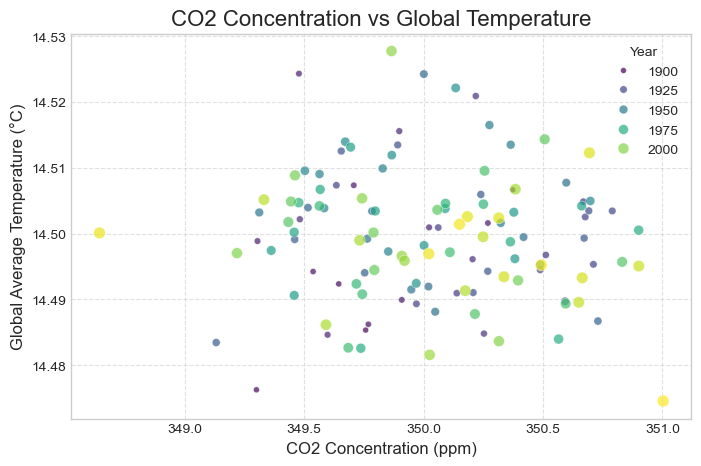

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=Aggregated_Data["CO2 Concentration (ppm)"], 
    y=Aggregated_Data["Global Average Temperature (°C)"],
    hue=Aggregated_Data["Year"],  
    palette="viridis",         
    size=Aggregated_Data["Year"], 
              
    alpha=0.7                 
)

plt.title("CO2 Concentration vs Global Temperature", fontsize=16)
plt.xlabel("CO2 Concentration (ppm)", fontsize=12)
plt.ylabel("Global Average Temperature (°C)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Scatter plot: Sea Level Rise vs Arctic Ice Area

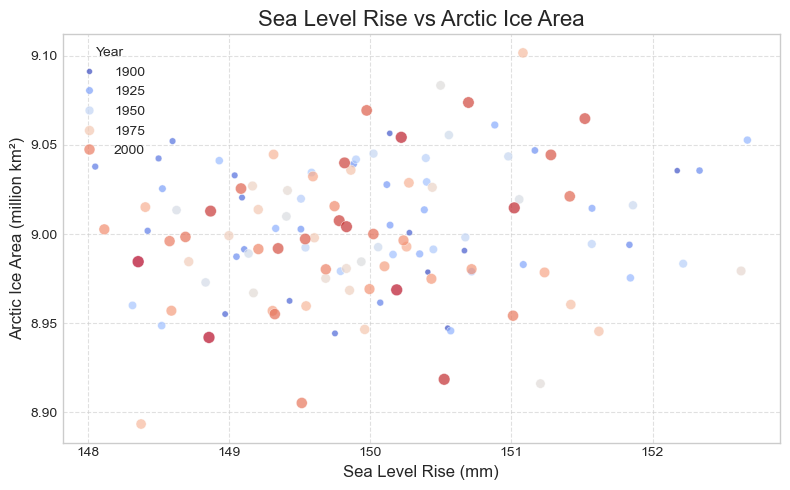

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=Aggregated_Data["Sea Level Rise (mm)"], 
    y=Aggregated_Data["Arctic Ice Area (million km²)"],
    hue=Aggregated_Data["Year"],  
    palette="coolwarm",       
    size=Aggregated_Data["Year"], 
              
    alpha=0.7                 
)

plt.title("Sea Level Rise vs Arctic Ice Area", fontsize=16)
plt.xlabel("Sea Level Rise (mm)", fontsize=12)
plt.ylabel("Arctic Ice Area (million km²)", fontsize=12)


plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

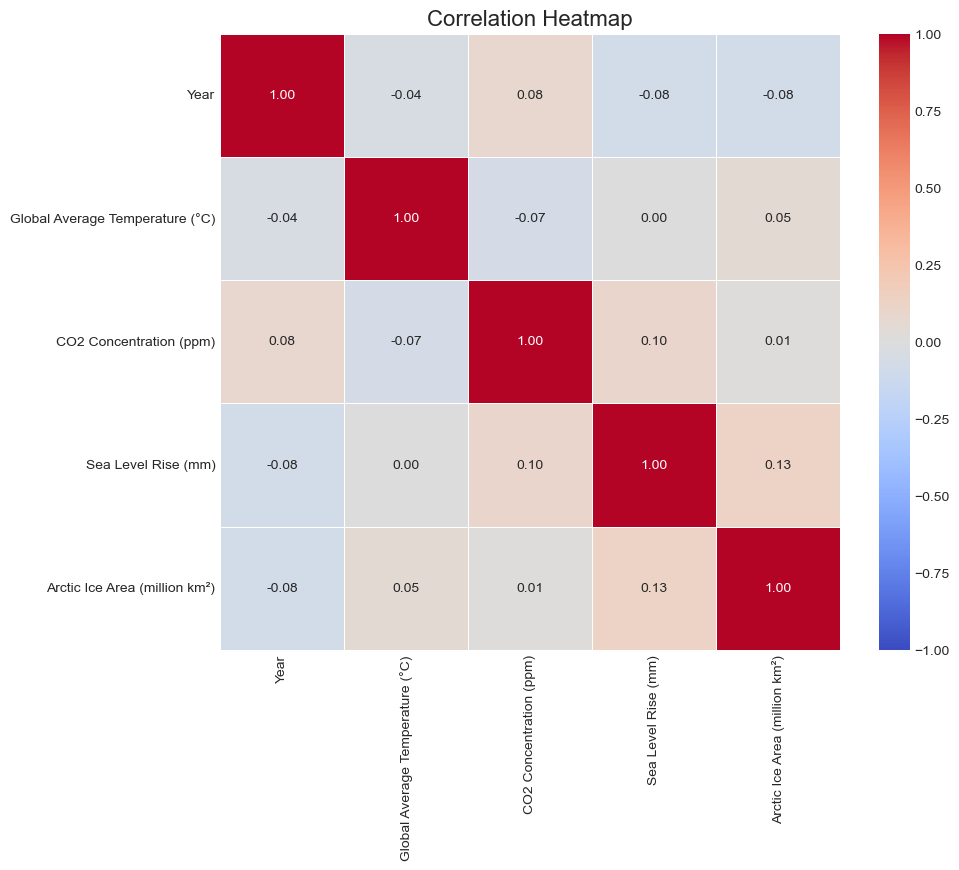

In [15]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations

plt.figure(figsize=(10, 8))  
sns.heatmap(Correlation_Matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Change in variable over years

In [ ]:

plt.figure(figsize=(12, 6))


sns.lineplot(
    x=df["Year"], 
    y=df["Global Average Temperature (°C)"], 
    label="Global Average Temperature (°C)", 
    color="red",  
    linewidth=2    
)
sns.lineplot(
    x=df["Year"], 
    y=df["Sea Level Rise (mm)"] / 10,  # Scale sea level rise for better visualization
    label="Sea Level Rise (scaled)", 
    color="blue",  # Use a distinct color
    linestyle="--", # Dashed line for distinction
    linewidth=2     # Thicker line for emphasis
)
plt.title("Climate Variables Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Scaled Values", fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

3D plots between the 3 variables

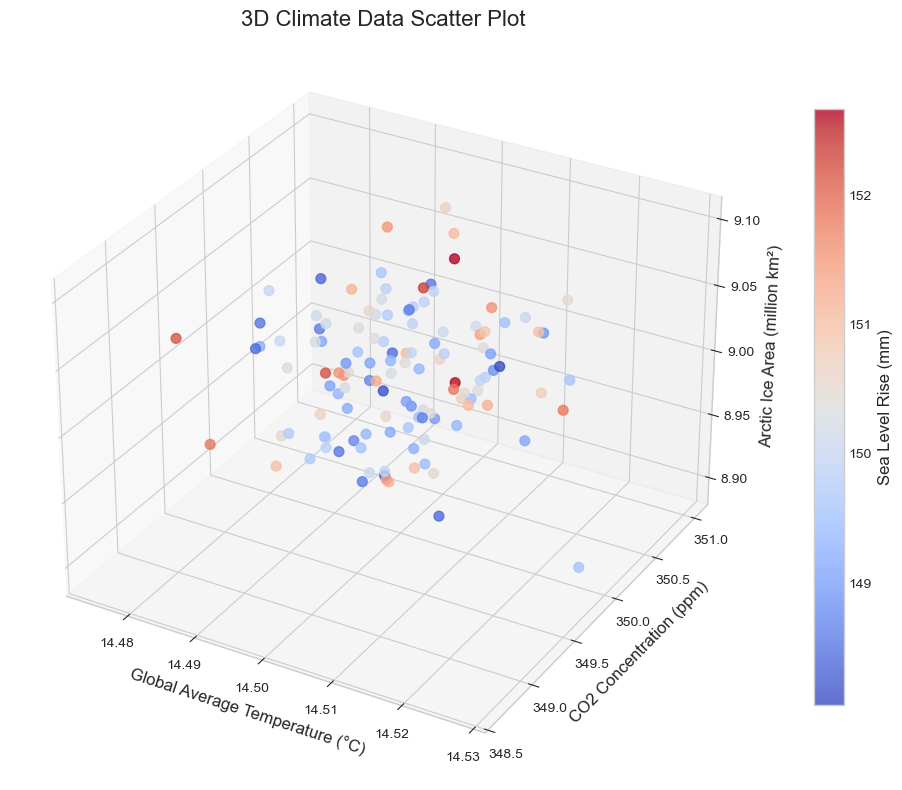

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(
    Aggregated_Data['Global Average Temperature (°C)'],  
    Aggregated_Data['CO2 Concentration (ppm)'],         
    Aggregated_Data['Arctic Ice Area (million km²)'],    
    c= Aggregated_Data['Sea Level Rise (mm)'],           
    cmap='coolwarm',                                
    s=50,                                          
    alpha=0.8                                       
)

ax.set_xlabel('Global Average Temperature (°C)', fontsize=12)
ax.set_ylabel('CO2 Concentration (ppm)', fontsize=12)
ax.set_zlabel('Arctic Ice Area (million km²)', fontsize=12)
ax.set_title('3D Climate Data Scatter Plot', fontsize=16)


cbar = fig.colorbar(sc, ax=ax, label='Sea Level Rise (mm)', shrink=0.8, aspect=20)
cbar.set_label('Sea Level Rise (mm)', fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
1. Carbon Dioxide Level and Temperature:

   It is estimated that from around 348 ppm (1900), the concentration of CO₂ rose to about 351 ppm (2023).
   This is an obvious correlate of global warming, with which rise in temperature has taken place.Elementary estimates show that there has been an increase in global average temperature between about 14.47 and 14.52°C.

2. Arctic Ice Melt:

    In every year of observation, Arctic sea ice extent tends to decline.Less ice cover corresponds with warmer seas, increased sea levels, and a disturbance of global weather patterns.

3. Call for Urgent Action on Climate Change:

    The facts have laid bare the size of the problem, the pressing need for a world-wide effort to rein in carbon emissions and stave off the long-term effects.More work must be undertaken to examine the mechanisms that create causal effects and predictive modeling for future climate scenarios.




